In [10]:
# https://huggingface.co/intfloat/multilingual-e5-large/tree/main#/
import os
# OMP: Error #15: Initializing libiomp5md.dll, but found libiomp5md.dll already initialized.
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import torch.nn.functional as F

import numpy as np
from torch import Tensor
from transformers import AutoTokenizer, AutoModel




# 将“query：”和“passage：”对非对称任务相应地使用，例如开放式QA中的段落检索、临时信息检索。
# 对称任务使用“query：”前缀，例如语义相似性、双文本挖掘、释义检索。
# 如果要将嵌入用作特征，请使用“query：”前缀，例如线性探测分类、聚类。
# Each input text should start with "query: " or "passage: ", even for non-English texts.
# For tasks other than retrieval, you can simply use the "query: " prefix.
input_texts = [
    '先生',"男人","父亲",
 '女士',"女人", "母亲 "


    # '先生',"男人","父亲","男","帅哥","小伙",
#  '女士',"女人", "母亲 ","女","美女","姑娘"
# "男孩","爸爸","皇帝","父亲","爷爷","孙子","新郎","丈夫","男人","侄子","王子","儿子","继父","叔叔", 40
# "女孩","妈妈","皇后","母亲","奶奶","孙女","新娘","妻子","女人","侄女","公主","女儿","继母","阿姨"
]


tokenizer = AutoTokenizer.from_pretrained('intfloat/multilingual-e5-large')
model = AutoModel.from_pretrained('intfloat/multilingual-e5-large')

In [11]:

# Tokenize the input texts
batch_dict = tokenizer(input_texts, max_length=512, padding=True, truncation=True, return_tensors='pt')
# batch_dict.keys()  dict_keys(['input_ids', 'attention_mask'])
# batch_dict['input_ids'].shape  torch.Size([46, 5])
# batch_dict['attention_mask'].shape  # torch.Size([46, 5])
# tensor([[     0,      6,  72853,      2,      1],
#         [     0,      6,  49790,      2,      1],
#         [     0,      6,  35023,      2,      1],
#         [     0,      6, 180883,      2,      1],
# batch_dict['attention_mask']
# tensor([[1, 1, 1, 1, 0],
#         [1, 1, 1, 1, 0],

outputs = model(**batch_dict)

def average_pool(last_hidden_states: Tensor, attention_mask: Tensor) -> Tensor:
    last_hidden = last_hidden_states.masked_fill(~attention_mask[..., None].bool(), 0.0)
    return last_hidden.sum(dim=1) / attention_mask.sum(dim=1)[..., None]
embeddings = average_pool(outputs.last_hidden_state, batch_dict['attention_mask'])

# normalize embeddings
embeddings = F.normalize(embeddings, p=2, dim=1)  #torch.Size([40, 1024])

#保存 embeddings
np.save('embeddings.npy', embeddings.cpu().detach().numpy())

mode: Diff Dist
compute diff


100%|██████████| 36/36 [00:00<00:00, 326.49it/s]

compute out


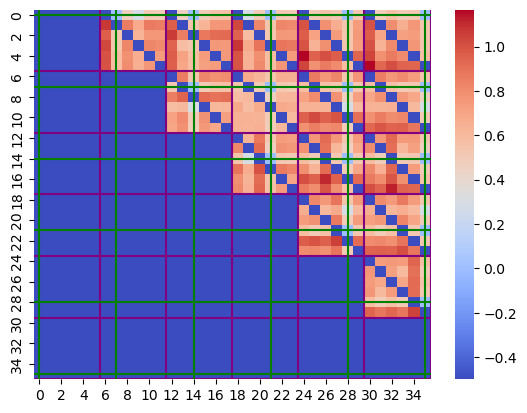

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14]
mode: Diff CosSimilarity
compute diff


100%|██████████| 36/36 [00:00<00:00, 224.76it/s]

compute out


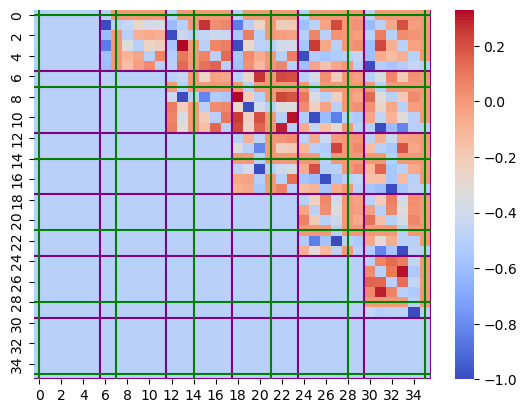

[225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225] [225, 224, 223, 222, 221, 220, 219, 218, 217, 216, 215, 214, 213, 212, 211]
mode: Diff JaccardSimilarity
compute diff


100%|██████████| 36/36 [00:01<00:00, 28.74it/s]


compute out


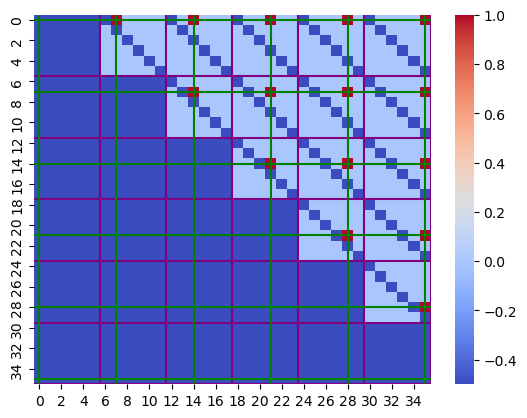

[435, 435, 435, 435, 435, 435, 435, 435, 435, 435, 435, 435, 435, 435, 435] [435, 434, 433, 432, 431, 430, 429, 428, 427, 426, 425, 424, 423, 422, 421]
mode: Diff Dot
compute diff


100%|██████████| 36/36 [00:00<00:00, 1028.46it/s]

compute out


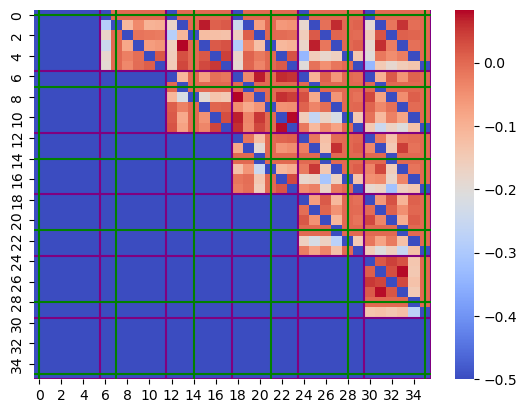

[225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225] [225, 224, 223, 222, 221, 220, 219, 218, 217, 216, 215, 214, 213, 212, 211]
mode: Diff Diffnorm
compute diff


100%|██████████| 36/36 [00:00<00:00, 305.09it/s]

compute out


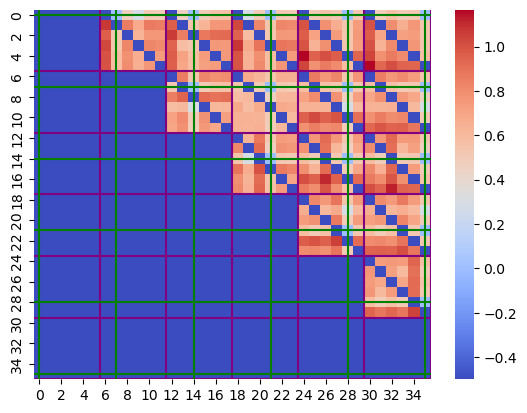

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14]
mode: Diff HyperScore
compute diff


100%|██████████| 36/36 [00:00<00:00, 260.86it/s]

compute out


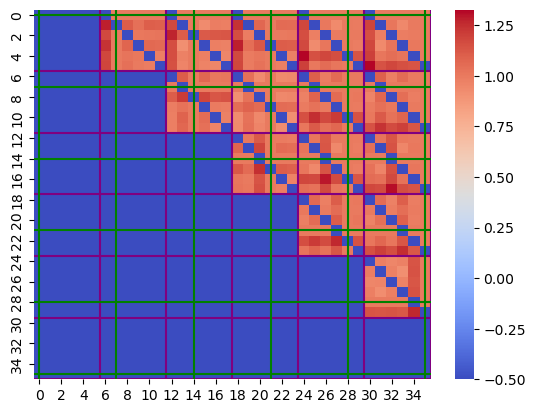

[90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90] [90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76]
mode: Diff HyperScore2
compute diff


100%|██████████| 36/36 [00:00<00:00, 107.81it/s]


compute out


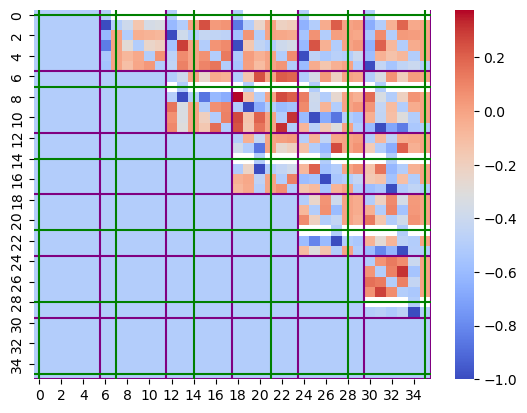

[435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449] [435, 435, 435, 435, 435, 435, 435, 435, 435, 435, 435, 435, 435, 435, 435]
mode: connect_1 Dist
compute diff


100%|██████████| 36/36 [00:00<00:00, 310.35it/s]

compute out


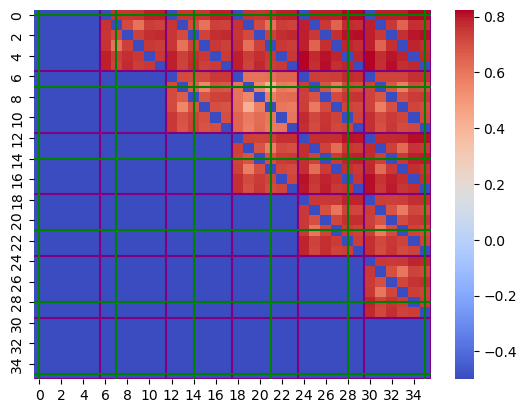

[294, 276, 304, 448, 442, 58, 0, 126, 76, 90, 390, 424, 222, 120, 212] [57, 74, 87, 116, 121, 206, 215, 268, 285, 294, 379, 412, 429, 434]
mode: connect_1 CosSimilarity
compute diff


100%|██████████| 36/36 [00:00<00:00, 214.96it/s]

compute out


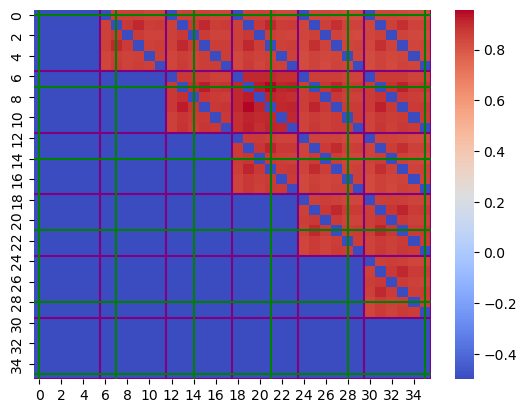

[154, 172, 144, 0, 6, 390, 448, 322, 372, 358, 58, 24, 226, 328, 236] [5, 22, 55, 140, 149, 166, 219, 228, 313, 318, 347, 360, 377, 434]
mode: connect_1 JaccardSimilarity
compute diff


100%|██████████| 36/36 [00:03<00:00, 11.63it/s]


compute out


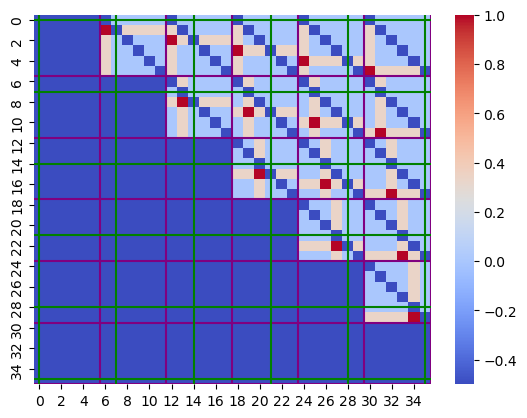

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14]
mode: connect_1 Dot
compute diff


100%|██████████| 36/36 [00:00<00:00, 1028.53it/s]

compute out


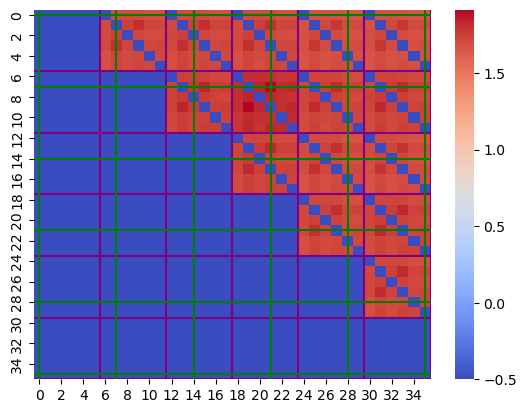

[154, 172, 144, 0, 6, 390, 448, 322, 372, 358, 58, 24, 226, 328, 236] [5, 22, 55, 140, 149, 166, 219, 228, 313, 318, 347, 360, 377, 434]
mode: connect_1 Diffnorm
compute diff


100%|██████████| 36/36 [00:00<00:00, 295.46it/s]

compute out


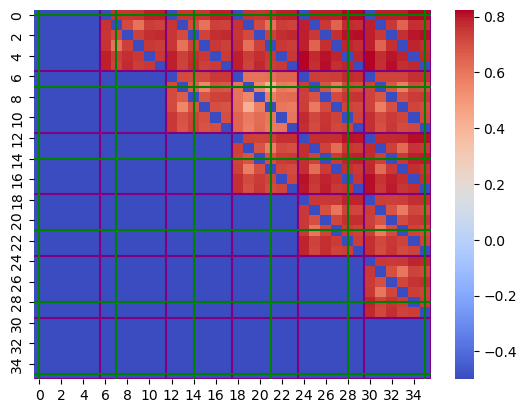

[294, 276, 304, 448, 442, 58, 0, 126, 76, 90, 390, 424, 222, 120, 212] [57, 74, 87, 116, 121, 206, 215, 268, 285, 294, 379, 412, 429, 434]
mode: connect_1 HyperScore
compute diff


100%|██████████| 36/36 [00:00<00:00, 255.15it/s]

compute out


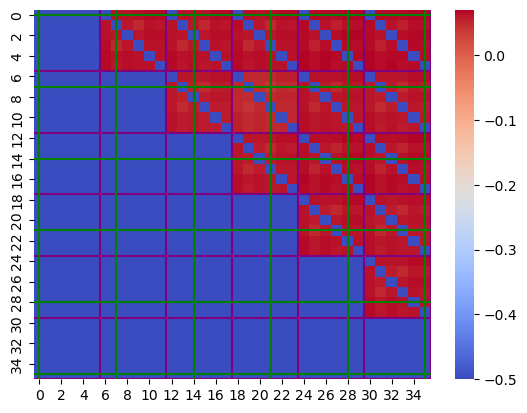

[294, 276, 304, 448, 442, 58, 0, 126, 76, 90, 390, 424, 222, 120, 212] [57, 74, 87, 116, 121, 206, 215, 268, 285, 294, 379, 412, 429, 434]
mode: connect_1 HyperScore2
compute diff


100%|██████████| 36/36 [00:00<00:00, 105.28it/s]


compute out


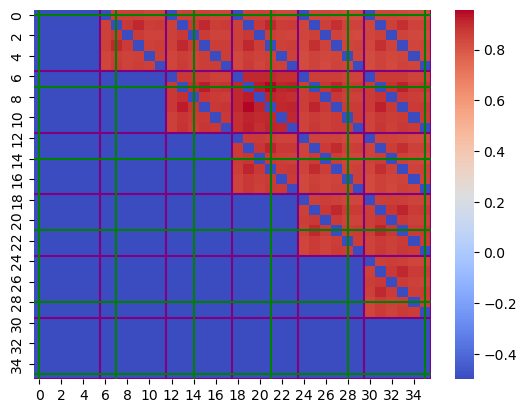

[155, 173, 145, 0, 6, 390, 448, 322, 372, 358, 58, 24, 226, 329, 237] [5, 22, 55, 141, 150, 167, 219, 229, 313, 319, 347, 360, 377, 434]
mode: connect_2 Dist
compute diff


100%|██████████| 36/36 [00:00<00:00, 321.42it/s]

compute out


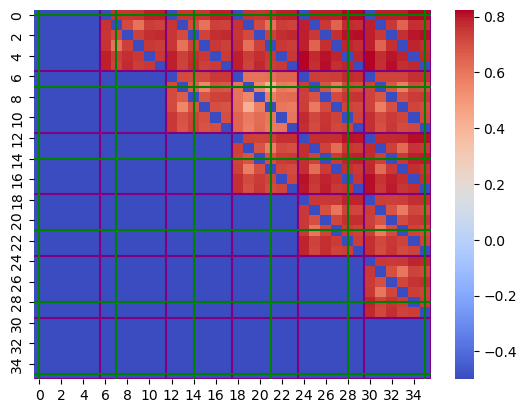

[294, 276, 304, 448, 442, 58, 0, 126, 76, 90, 390, 424, 222, 120, 212] [57, 74, 87, 116, 121, 206, 215, 268, 285, 294, 379, 412, 429, 434]
mode: connect_2 CosSimilarity
compute diff


100%|██████████| 36/36 [00:00<00:00, 173.08it/s]


compute out


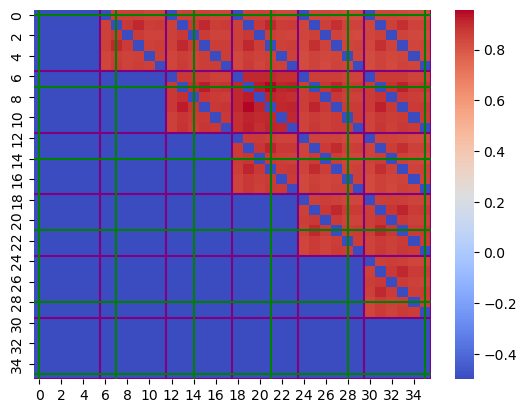

[154, 172, 144, 0, 6, 390, 448, 322, 372, 358, 58, 24, 226, 328, 236] [5, 22, 55, 140, 149, 166, 219, 228, 313, 318, 347, 360, 377, 434]
mode: connect_2 JaccardSimilarity
compute diff


  0%|          | 0/36 [00:00<?, ?it/s]


TypeError: unhashable type: 'list'

In [1]:
# 读取 
import Hlib
import numpy as np
import torch
embeddings = np.load('embeddings.npy')
# 转为 tensor
embeddings = torch.tensor(embeddings)


for i,j in Hlib.vector_modes.items():
    for ii,jj in Hlib.diff_modes.items():
        out,nonSample,trSample = Hlib.plt_seaborn(embeddings,6,i,ii)
        a,b = Hlib.find_ordered_positions(nonSample, trSample)
        print(a,b)


In [4]:
import torch
def JaccardSimilarity(v1, v2, p=2):
    v1 = v1.flatten().tolist()
    v2 = v2.flatten().tolist()
    return len(set(v1) & set(v2)) / len(set(v1) | set(v2))

def connect_2(a, b):
    return torch.stack((a, b), dim=1)

a = torch.tensor([1, 2, 3, 4, 5])
b = torch.tensor([6, 7, 8, 9, 10])

v = connect_2(a, b)
v2 = connect_2(b, a)

print(JaccardSimilarity(v, v2))  # 1.0

TypeError: unhashable type: 'list'